<a href="https://colab.research.google.com/github/filnels/Homeworks/blob/main/Linear_regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_theme(style='darkgrid', palette='deep')
import warnings
warnings.filterwarnings('ignore')
import missingno as msno

In [ ]:
# Розглянемо перший датасет:
red_wine = pd.read_csv('winequality-red.csv', sep=';')

In [ ]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
# таким образом пропуски отстуствуют в данных, присутствует категориальный тип - тип вина

In [ ]:
red_wine['quality'].describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

In [ ]:
# среднее качество красного вина 5.6, минимальное - 3, максимальное 8

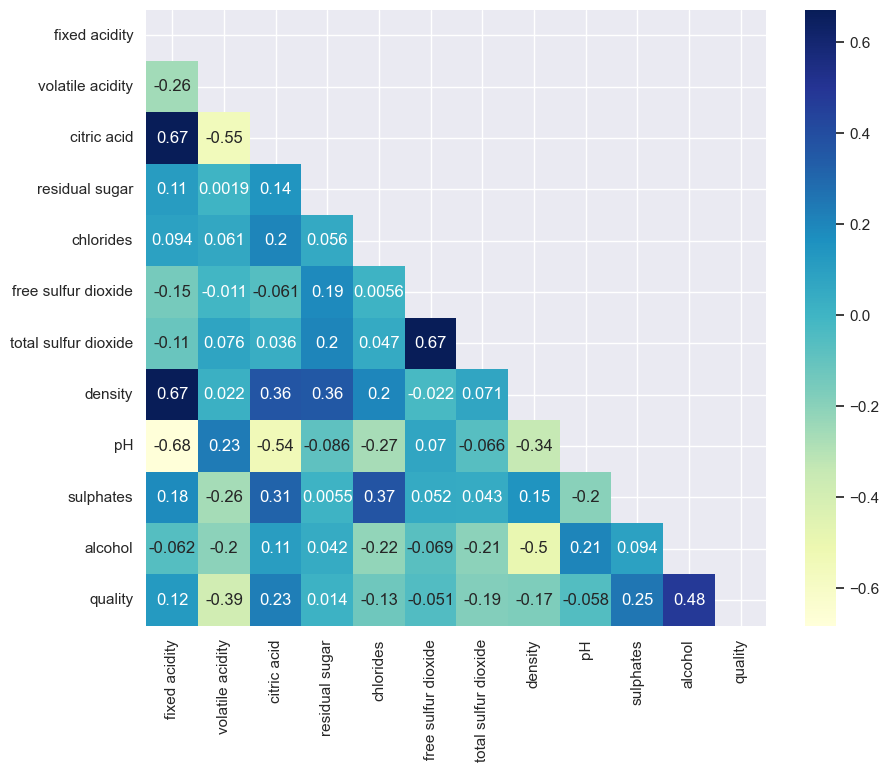

In [ ]:
# Корреляционная матрица
# Удаляем нечисловые столбцы
red_wine = red_wine.select_dtypes(include=[float, int])
plt.figure(figsize=(10, 8))
corr_matrix = red_wine.corr()

# Для зручності сприйняття створимо маску для правої верхньої частини матриці
mask = np.triu(corr_matrix)

# Створимо теплову карту з врахуванням маски
sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True, mask=mask)
plt.show()


In [ ]:
# видим, что для большинства данныхх для красного вина отстутствует корреляция, максимальное значение 0,67 мы видим для fixed acidity и dencity,
# fixed acidity и cidric acid,  free sulfur dioxide и total dioxide sulfur.


In [ ]:
# Розглянемо другий датасет:
white_wine = pd.read_csv('winequality-white.csv', sep=';')

In [ ]:
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [ ]:
# таким образом пропуски отстуствуют в данных

In [ ]:
white_wine['quality'].describe()

count    4898.000000
mean        5.877909
std         0.885639
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

In [ ]:
# видим что статитстические показатели  качеста для обоих вин приблиительно одинаковые.
# средний показатель качества 5.9, минимум - 3, максимум 9.  представленные белые вина более качественные

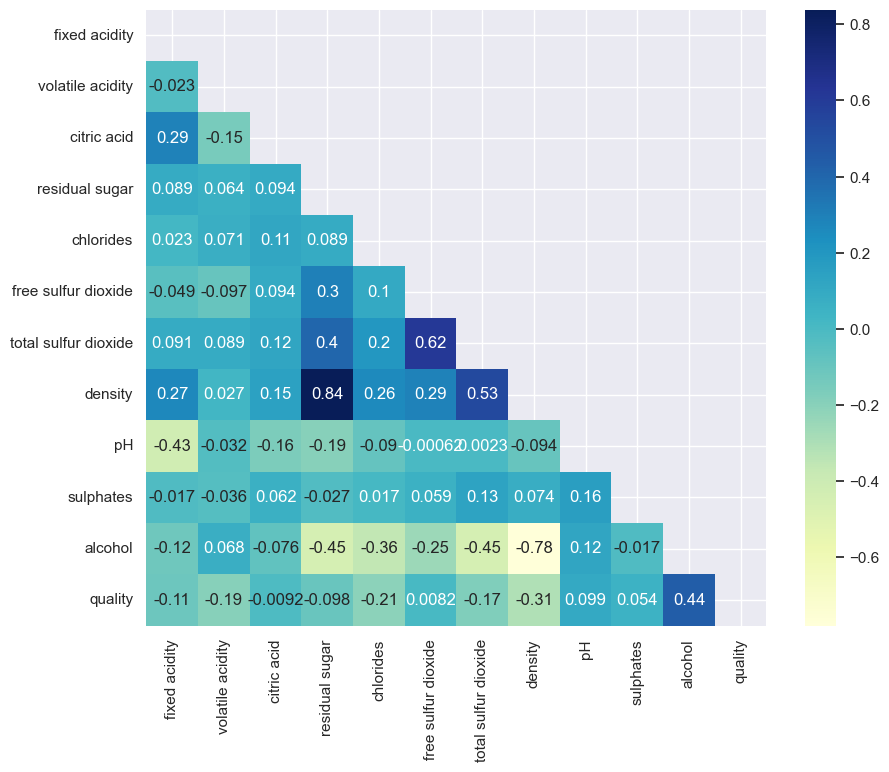

In [ ]:
# Корреляционная матрица
# Удаляем нечисловые столбцы
white_wine = white_wine.select_dtypes(include=[float, int])
plt.figure(figsize=(10, 8))
corr_matrix_white = white_wine.corr()

# Для зручності сприйняття створимо маску для правої верхньої частини матриці
mask = np.triu(corr_matrix_white)

# Створимо теплову карту з врахуванням маски
sns.heatmap(corr_matrix_white, cmap="YlGnBu", annot=True, mask=mask)
plt.show()

In [ ]:
# видим, что для большинства данныхх для белого вина также отстутствует корреляция. Для residual и sugar density 0.84
# free sulfur dioxide и total dioxide sulfur 0.62.
# также видим, что для обоих вин различные коэффициенты корелляции, поэтому анализировать влияние данных характеристик нужно в отдельных датасетах.

<Axes: xlabel='quality', ylabel='Count'>

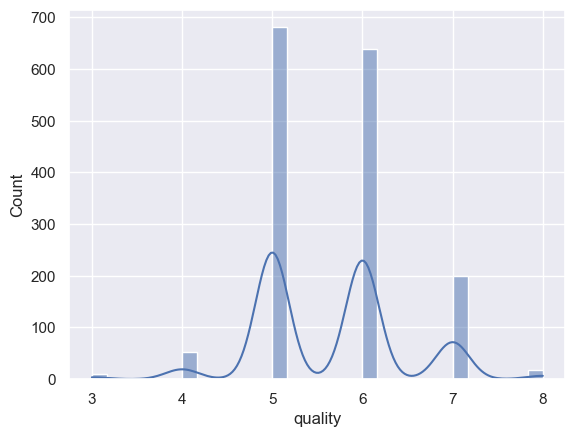

In [ ]:
# Подивимось на графік розподілу якості червоного віна:
sns.histplot(data=red_wine, x='quality', kde=True)

In [ ]:
# на графике мы видим что большая часть  красных вин имеет качество 5 и 6, т.е. среднее качество. линия KDE имеет несколько пиков (мультимодальное распределение),
# это может означать наличие нескольких групп вин с разными уровнями качества.

<Axes: xlabel='quality', ylabel='Count'>

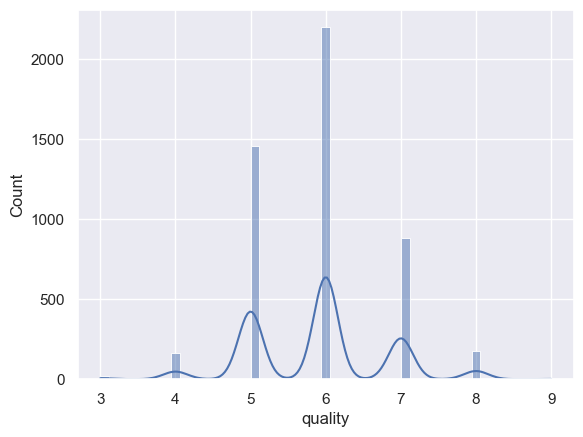

In [ ]:
# Подивимось на графік розподілу якості білого віна:
sns.histplot(data=white_wine, x='quality', kde=True)

In [ ]:
# на графике мы видим что большая часть  белых вин имеет качество  6. Также наблюдается мультимодальное распределение.

In [ ]:
# Посмотрим как распределены алкоголь и летучая кислотность для вин

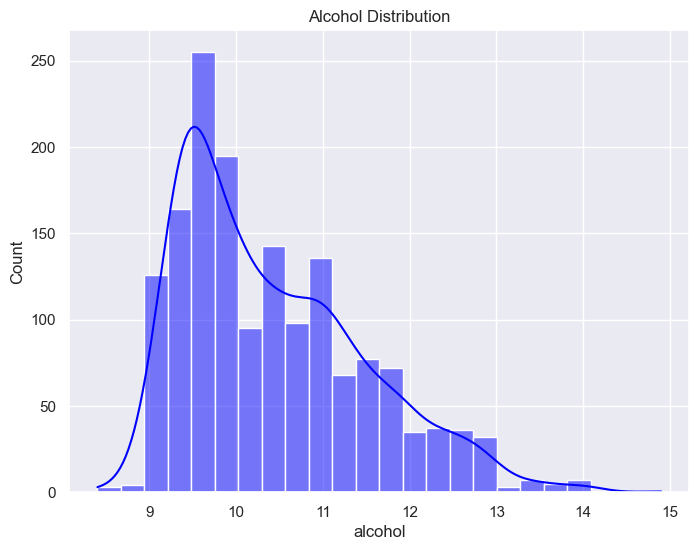

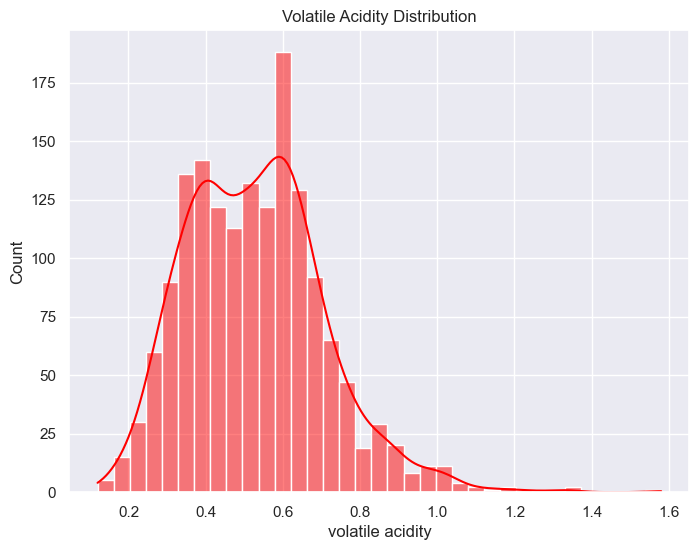

In [ ]:
# Гистограмма с KDE для алкоголя красного вина
plt.figure(figsize=(8, 6))
sns.histplot(data=red_wine, x='alcohol', kde=True, color='blue')
plt.title('Alcohol Distribution')
plt.show()

# Гистограмма с KDE для летучей кислотности красного вина
plt.figure(figsize=(8, 6))
sns.histplot(data=red_wine, x='volatile acidity', kde=True, color='red')
plt.title('Volatile Acidity Distribution')
plt.show()

In [ ]:
#  распределение алкоголя для красного вина неравномереное, с пиком 9.5 градусов. Летучая кислотность имеет форму близкую к
# нормальному распределению с двумя пиками  0.4, и 0.65

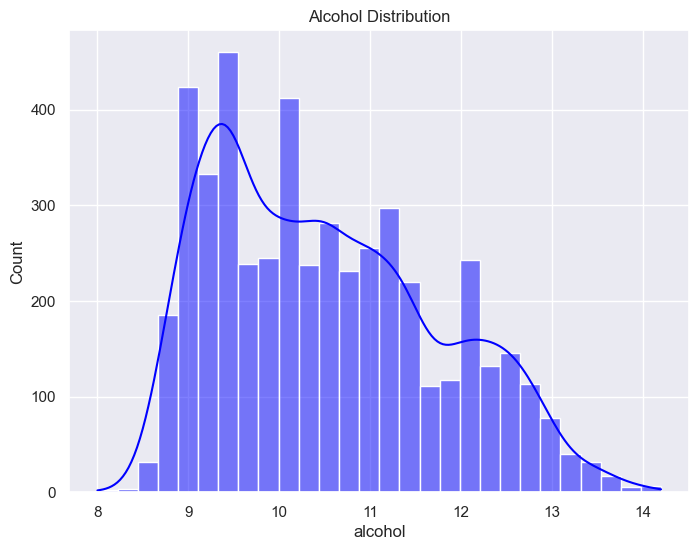

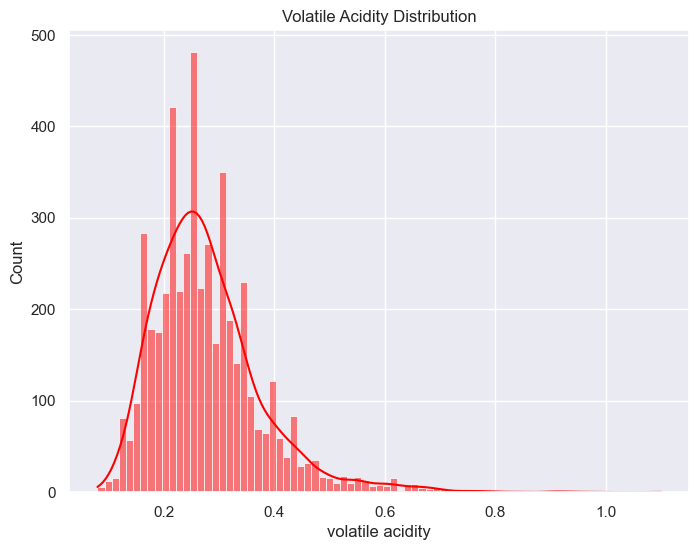

In [ ]:
# Гистограмма с KDE для алкоголя белого вина
plt.figure(figsize=(8, 6))
sns.histplot(data=white_wine, x='alcohol', kde=True, color='blue')
plt.title('Alcohol Distribution')
plt.show()

# Гистограмма с KDE для летучей кислотности белого вина
plt.figure(figsize=(8, 6))
sns.histplot(data=white_wine, x='volatile acidity', kde=True, color='red')
plt.title('Volatile Acidity Distribution')
plt.show()

In [ ]:
#миы видим что для распределения алкоголя напоминает график для красного вина
# кислотность также имеет форму нормального распределения с одним пиком  0.25

In [ ]:
# посмотрим как алкоголь и кислотность влияют на качество красного вина

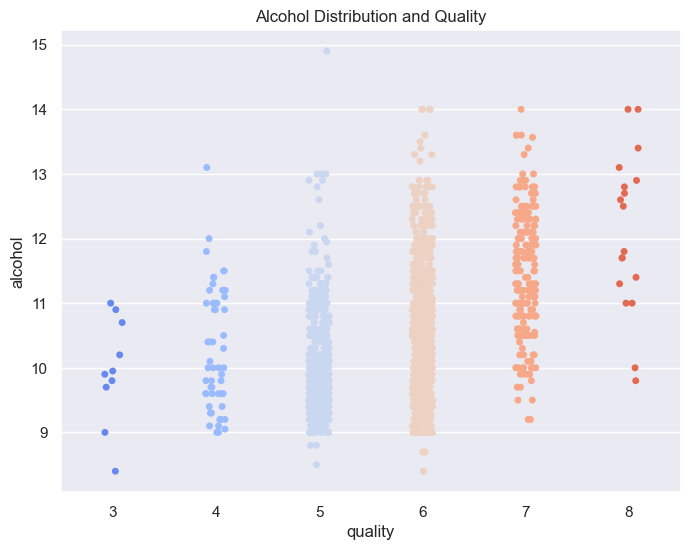

In [ ]:
plt.figure(figsize=(8, 6))
sns.stripplot(data=red_wine, x='quality', y='alcohol', jitter=True, palette='coolwarm')
plt.title('Alcohol Distribution and Quality')
plt.show()

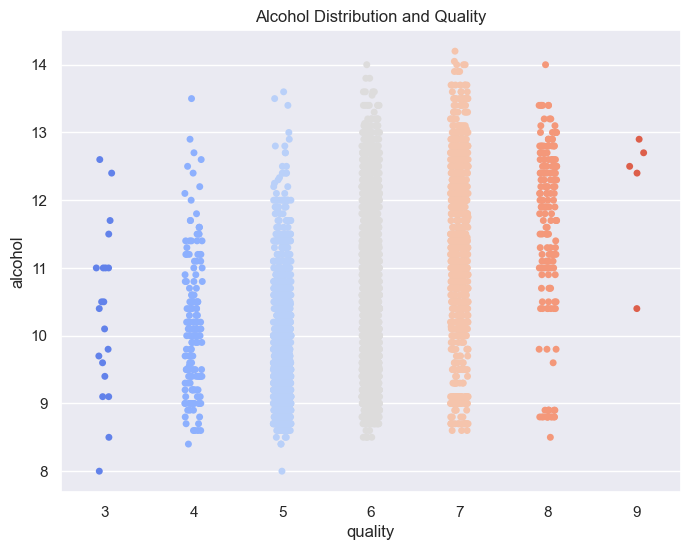

In [ ]:
plt.figure(figsize=(8, 6))
sns.stripplot(data=white_wine, x='quality', y='alcohol', jitter=True, palette='coolwarm')
plt.title('Alcohol Distribution and Quality')
plt.show()

In [ ]:
# Видим, что качество вина зависит от процента алкоголя, с более низким содержанием алкоголя, вино низкого качества,  чем
# большее содержание алкоголя, тем качественне вино. Для обоих вин

In [ ]:
# посмотрим дополнительно на график для осредненных значения алкоголя в зависимости от качества белого вина

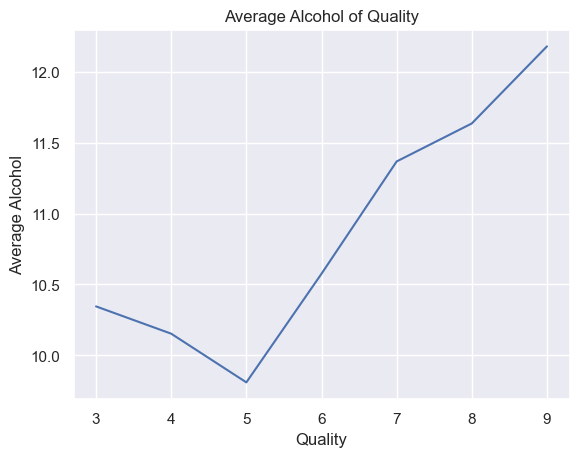

In [ ]:
average_alcohol = white_wine.groupby('quality')['alcohol'].mean().to_frame()
sns.lineplot(data=average_alcohol, x=average_alcohol.index, y='alcohol')

plt.title('Average Alcohol of Quality')
plt.xlabel('Quality')
plt.ylabel('Average Alcohol')

plt.show()



In [ ]:
# видим что начиная от вин качества "5" у нас возрастающий график

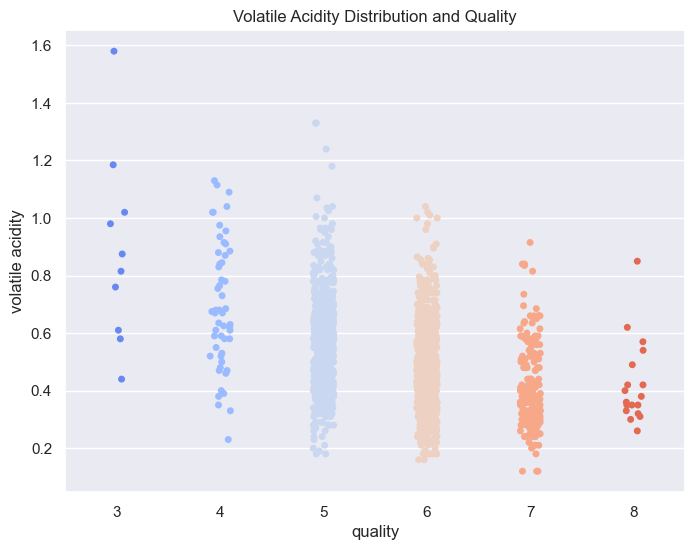

In [ ]:
plt.figure(figsize=(8, 6))
sns.stripplot(data=red_wine, x='quality', y='volatile acidity', jitter=True, palette='coolwarm')
plt.title('Volatile Acidity Distribution and Quality')
plt.show()

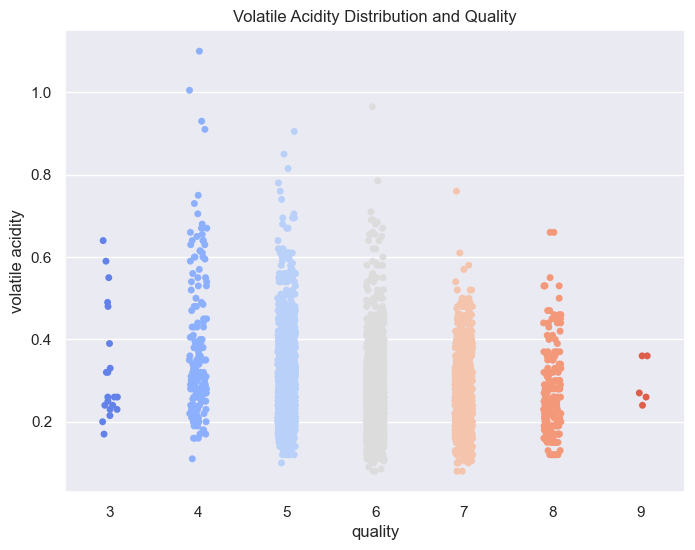

In [ ]:
plt.figure(figsize=(8, 6))
sns.stripplot(data=white_wine, x='quality', y='volatile acidity', jitter=True, palette='coolwarm')
plt.title('Volatile Acidity Distribution and Quality')
plt.show()

In [ ]:
# Видим, что качество вина зависит от летучей кислотности, с более низким содержанием кислоты, вино выше качества, это свойство обнаружено для обоих вин

In [ ]:
# посмотрим как влияет лимонная кислота на качество белого вина

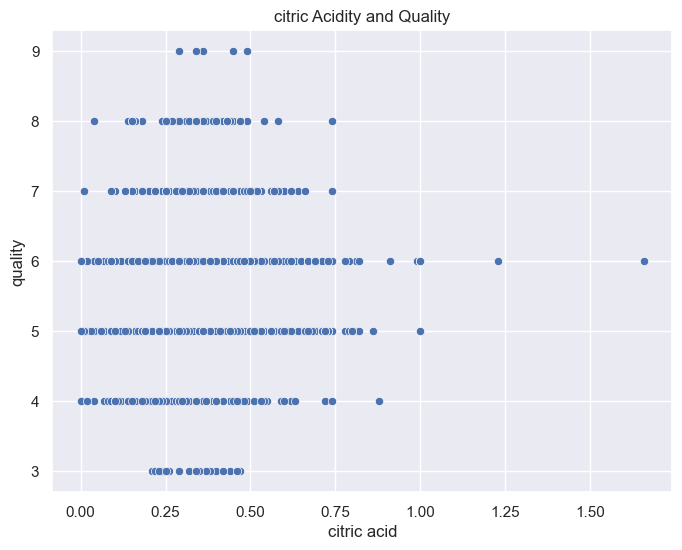

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=white_wine, x='citric acid', y='quality')
plt.title('citric Acidity and Quality')
plt.show()

In [ ]:
# мы видим, что чем качественне вино, тем разброс лимонной кислотности сходится (для качества вина 9), и находится в пределах 0.30 и 0.50.
# т.е. для того чтобы вино было качественным необходим баланс данной кислоты. Для низкого качества  вина со значением 3 мы видим похожее соотношение
# это скорее всего связано с недостаточным количеством данных данного качества.

In [ ]:
# посмотрим как pH  влияет на качество вина

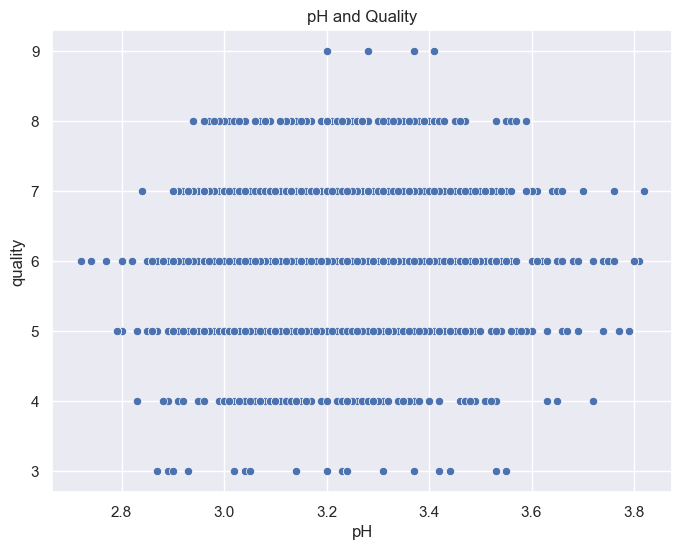

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=white_wine, x='pH', y='quality')
plt.title('pH and Quality')
plt.show()

In [ ]:
# видим, что данный график не дает полного понимания влияния pH, осредним значения pH в зависимости от качества вина

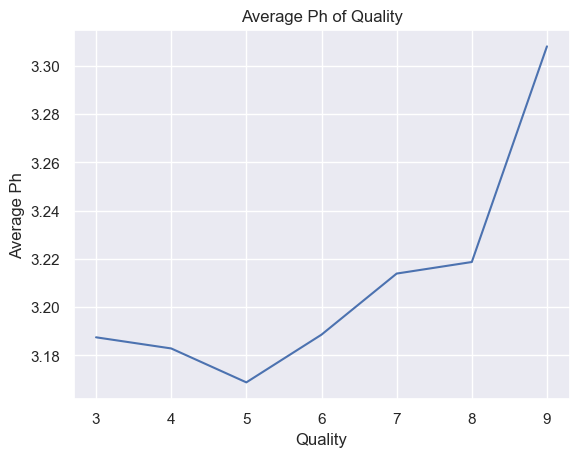

In [ ]:
average_pH = white_wine.groupby('quality')['pH'].mean().to_frame()
sns.lineplot(data=average_pH, x=average_pH.index, y='pH')

plt.title('Average Ph of Quality')
plt.xlabel('Quality')
plt.ylabel('Average Ph')

plt.show()



In [ ]:
# теперь картина более понятна, видм тенденцию, что для качественных вин pH находится в пределах от 3.2 и дальше растет до 3.3
# к сожалению данные огранчены качеством вина 9. Но известно что pH должно находится в пределах от 3 до 4.

In [ ]:
#  построим линейную модель (модель линейной регресси) для данных белого вина, и посмотрим как влияют  residual sugar, Alcohol, pH, Sulphates, Chlorides
# на плотность вина

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Выбираем только числовые признаки, которые могут влиять на плотность
X = white_wine[['residual sugar', 'alcohol', 'pH', 'sulphates', 'chlorides']]
y = white_wine['density']

# Разделяем данные на обучающие и тестовые наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Строим модель  линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)


print('R^2 Score:', model.score(X_test, y_test))



R^2 Score: 0.9316532976228553


In [ ]:
# R² Score, равный 0.93, говорит о том, что модель линейной регрессии объясняет 93% распределения   переменной density на основе входных признаков:
# residual sugar, Alcohol, pH, Sulphates, Chlorides. Это очень высокий показатель, т.е.  модель хорошо  предсказывет плотность вина.

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5)
print('Cross-Validation Scores:', scores)
print('Mean CV Score:', scores.mean())


Cross-Validation Scores: [0.94198488 0.83620922 0.87444912 0.94750018 0.92266502]
Mean CV Score: 0.9045616842395159


In [ ]:
# средний показатель Score говорит, что в целом модель хорошо предсказывает плотность вина,
# однако мы видим вариацию Score от 0.83 до 0.95, поэтому скорее всего на некотороых частях данных данная зависимость не столь выражена.

In [ ]:
# Создадим новые фичи с представленных химических параметров вина, и проверим имеют ли они влияние на качество вина

In [ ]:
# Отношение сахара к кислотности

In [ ]:
white_wine['sugar acid ratio'] = white_wine['residual sugar'] / white_wine['fixed acidity']


In [ ]:
# Соотношение свободного и общего содержания серы

In [ ]:
white_wine['free total sulfur ratio'] = white_wine['free sulfur dioxide'] / white_wine['total sulfur dioxide']


In [ ]:
# pH и кислотность

In [ ]:
white_wine['acidity ph interaction'] = white_wine['fixed acidity'] * white_wine['pH']


In [ ]:
# Содержание алкоголя на единицу сахара

In [ ]:
white_wine['alcohol sugar ratio'] = white_wine['alcohol'] / white_wine['residual sugar']


In [ ]:
# Высокий уровень серы:

In [ ]:
white_wine['high sulfur'] = white_wine['total sulfur dioxide'].apply(lambda x: 1 if x > 50 else 0)


In [ ]:
# Взаимодействие плотности и алкоголя:

In [ ]:
white_wine['density alcohol interaction'] = white_wine['density'] * white_wine['alcohol']


In [ ]:
# Взаимодействие плотности и сахара:

In [ ]:
white_wine['density sugar interaction'] = white_wine['density'] * white_wine['residual sugar']


In [ ]:
# посмотрим как коррелруют новые признаки

In [ ]:
# создадим корреляционную матрицу, чтобы посмотреть появились ли новые зависимости в новых химическиххарактеристиках

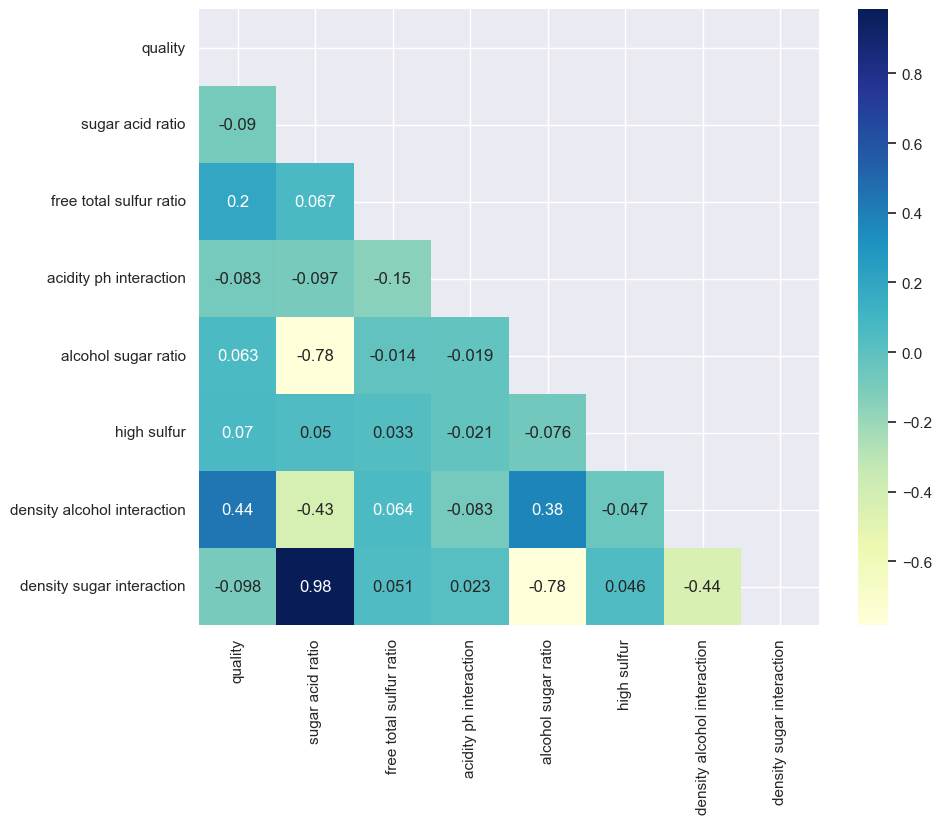

In [ ]:
# Выбираем интересующие столбцы
features_new = ['quality', 'sugar acid ratio', 'free total sulfur ratio', 'acidity ph interaction', 'alcohol sugar ratio', 'high sulfur','density alcohol interaction', 'density sugar interaction']

# Создаем новый датафрейм только с выбранными столбцами
white_wine_new = white_wine[features_new]

# Рассчитываем корреляционную матрицу для выбранных столбцов
corr_matrix_new = white_wine_new.corr()

# Строим тепловую карту для выбранных столбцов
plt.figure(figsize=(10, 8))
mask = np.triu(corr_matrix_new)
sns.heatmap(corr_matrix_new, cmap="YlGnBu", annot=True, mask=mask)
plt.show()



In [ ]:

# Видим сильную корреляцию между взаимодействием сахара и плотности и отношение сахара к кислотности. построим график и линию
# регресси для данной зависимотси

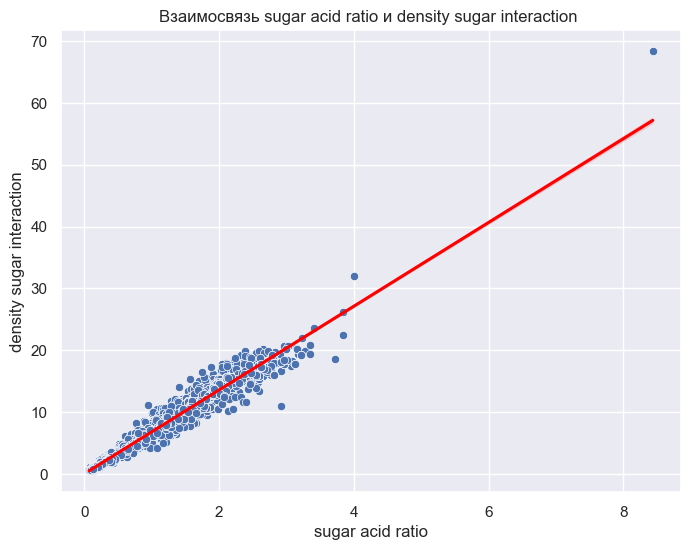

In [ ]:


# График для взаимодействия сахара и плотности и отношение сахара к кислотности
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sugar acid ratio', y='density sugar interaction', data=white_wine_new)
sns.regplot(x='sugar acid ratio', y='density sugar interaction', data=white_wine_new, scatter=False, color='red')  # Линия регрессии
plt.title('Взаимосвязь sugar acid ratio и density sugar interaction ')
plt.xlabel('sugar acid ratio')
plt.ylabel('density sugar interaction')
plt.show()



In [ ]:
# Проанализируем кислотность от типа вина, для этого объединим данные

In [ ]:
# объединяем данные с двух датасетов

In [ ]:
# Добавляем новый столбец с признаком 'wine_type'
red_wine['wine_type'] = 'red'
white_wine['wine_type'] = 'white'

#Объединяем
wine_combined = pd.concat([red_wine, white_wine], ignore_index=True)

print(wine_combined.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality wine_type  sugar acid ratio  free total sulfur ratio  \
0      9.4

In [ ]:
wine_combined.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,...,quality,wine_type,sugar acid ratio,free total sulfur ratio,acidity ph interaction,alcohol sugar ratio,high sulfur,density alcohol interaction,density sugar interaction,quality_cat
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,...,5,red,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medium
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,...,5,red,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medium
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,...,5,red,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,...,6,red,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,...,5,red,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medium


In [ ]:
# Средние значения  кислотности по цвету вина

In [ ]:
wine_combined['avg_acidity_by_color'] = wine_combined.groupby('wine_type')['fixed acidity'].transform('mean')


In [ ]:
# посмотрим среднюю кислотность для каждого типа вина (красное и белое):

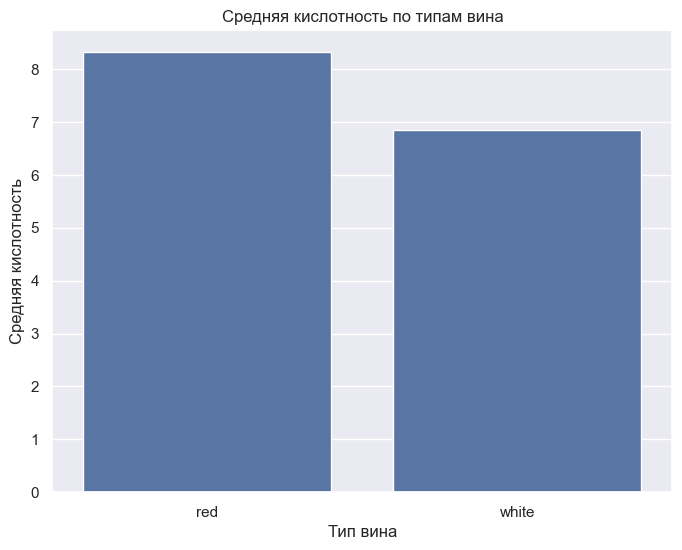

In [ ]:

# диаграмма для средней кислотности в зависимости от типа вина
plt.figure(figsize=(8, 6))
sns.barplot(x='wine_type', y='avg_acidity_by_color', data=wine_combined)
plt.title('Средняя кислотность по типам вина')
plt.xlabel('Тип вина')
plt.ylabel('Средняя кислотность')
plt.show()


In [ ]:
# видим, что для  красных вин кислотность больше. посмотрим разброс кислотности для каждого типа вина

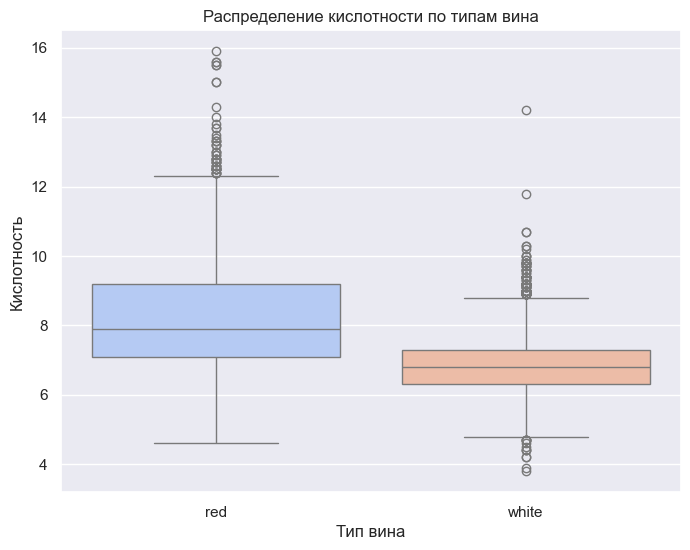

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='wine_type', y='fixed acidity', data=wine_combined, palette='coolwarm')
plt.title('Распределение кислотности по типам вина')
plt.xlabel('Тип вина')
plt.ylabel('Кислотность')
plt.show()


In [ ]:
#для красных вин медианное значение кислотности 8, 50% значений находятся от 7.3 до 9.3.
#Для белых вин диапазон кислотности находится от 5 до 9, медианное значение равно 7. таким образом красные вина более кислые.